In [1]:
!pip install wordcloud

In [2]:
!pip install matplotlib==3.3.4

In [4]:
!pip install seaborn

In [5]:
!pip install datetime

In [6]:
!pip install plotly

In [7]:
!pip  install openpyxl

In [8]:
!pip  install openpyxl -i http://pypi.doubanio.com/simple/ --trusted-host pypi.doubanio.com

Looking in indexes: http://pypi.doubanio.com/simple/


In [9]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from scipy.stats import pearsonr
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D
import plotly as ply
import plotly.io as pio
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 问题一

In [46]:
# 设置全局的图形参数
sns.set_style(
    # 图形风格
    "whitegrid", 
    # 网格默认不显示
    {'axes.grid' : False})

sns.set_context(rc={
    # 标题大小
    'axes.titlesize': 25,
    # 轴的上标题大小
    'axes.labelsize': 25,
    # x轴刻度文字大小
    'xtick.labelsize': 8,                 #将刻度文字设置为纵向的
    # y轴刻度文字大小
    'ytick.labelsize': 15})

# 设置中文显示
# 不同系统的设置方式可能会有所不同！
matplotlib.rcParams['font.family']=['FangSong']
matplotlib.rcParams['axes.unicode_minus'] = False

In [47]:
fvip = pd.read_excel('data/air_data.xlsx')
# 将会员数据按年龄进行分箱
age_cuts = pd.cut(fvip['AGE'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 100], 
                      labels=['10岁及以下', '10 - 20岁', '20 - 30岁', '30 - 40岁', '40-50岁', '50-60岁', '60-70岁', '70岁及以上'])
fvip['AGE'] = age_cuts
fvip['AGE']
fvip.head()

,index,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,0,54993,2006-11-02,2008-12-24,男,6,.,北京,CN,30 - 40岁,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,1,28065,2007-02-19,2007-08-03,男,6,NaN,北京,CN,40-50岁,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,2,55106,2007-02-01,2007-08-30,男,6,.,北京,CN,30 - 40岁,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,3,39546,2009-04-10,2009-04-15,男,6,贵阳,贵州,CN,40-50岁,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
4,4,56972,2008-02-10,2009-09-29,男,6,广州,广东,CN,60-70岁,...,2460,29783,29783,343121,152538,0.456522,0.543478,0.608233,0.391764,15


In [49]:
# 计算各个省份的会员数量
vip_workpro_num = fvip.groupby('WORK_PROVINCE')['MEMBER_NO'].agg({'count'}).reset_index()


In [72]:
#降序排列
vip_workpro_num = vip_workpro_num.sort_values('count', ascending=False)


,WORK_PROVINCE,count
12,广东,18293
3,北京,8102
0,上海,5193
28,辽宁,5079
14,新疆,2516
5,吉林,2354
21,湖北,1526
33,黑龙江,1481
18,河南,1270
15,江苏,1190


绘制柱形图

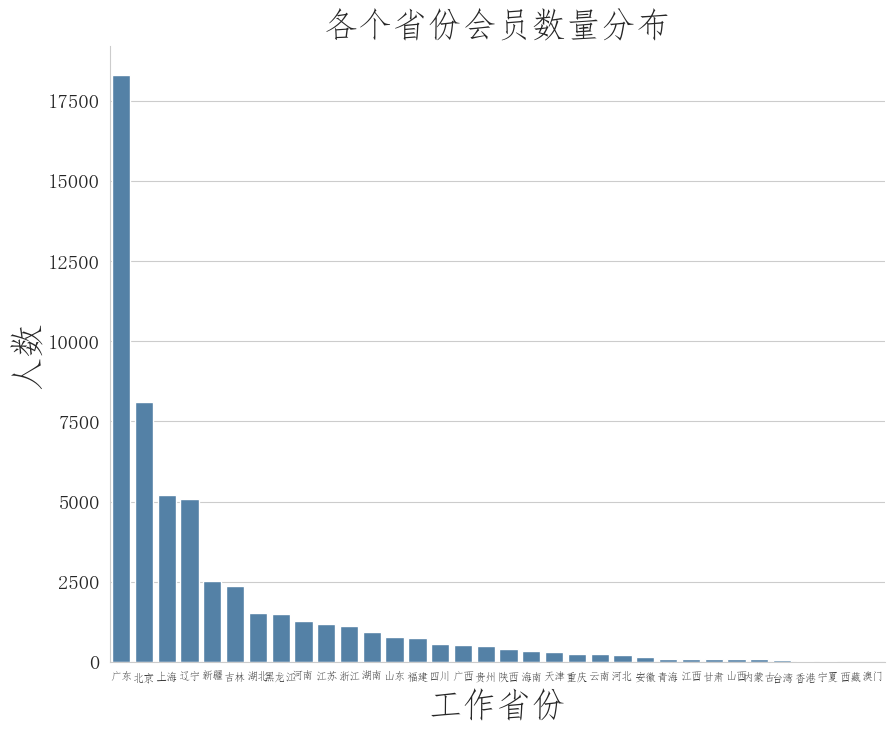

In [73]:
plt.figure(figsize=(10, 8))
sns.barplot(x='WORK_PROVINCE',  y='count', data=vip_workpro_num,
            color='steelblue')
# 去掉上边和右边边框
sns.despine()
plt.grid(axis='y')
plt.xlabel('工作省份')
plt.ylabel('人数')
plt.title('各个省份会员数量分布')
plt.show()

绘制散点图

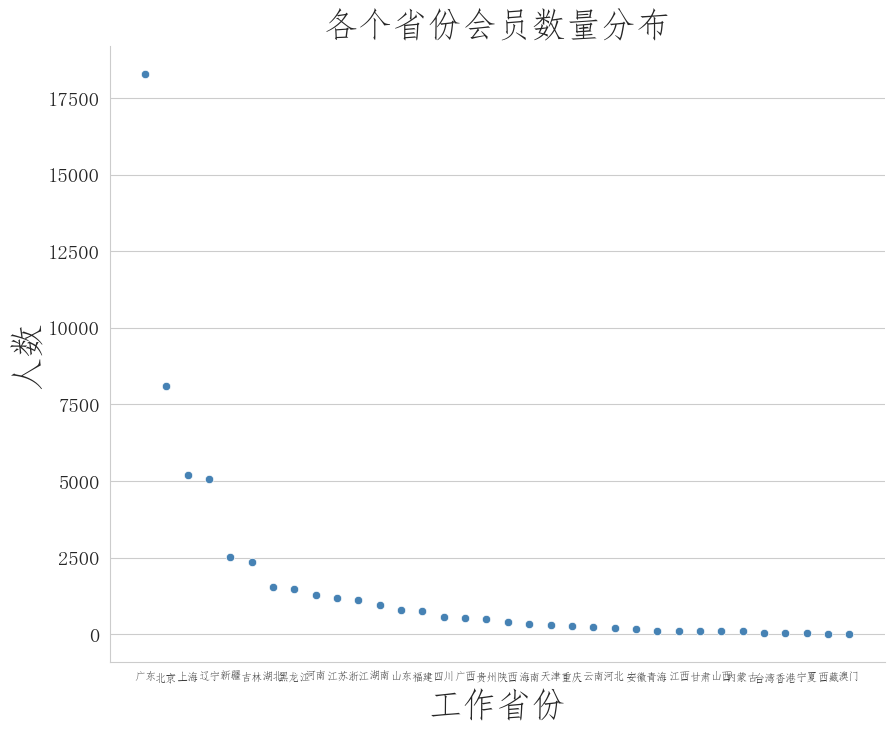

In [74]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='WORK_PROVINCE',  y='count', data=vip_workpro_num,
            color='steelblue')
# 去掉上边和右边边框
sns.despine()
plt.grid(axis='y')
plt.xlabel('工作省份')
plt.ylabel('人数')
plt.title('各个省份会员数量分布')
plt.show()

绘制箱型图

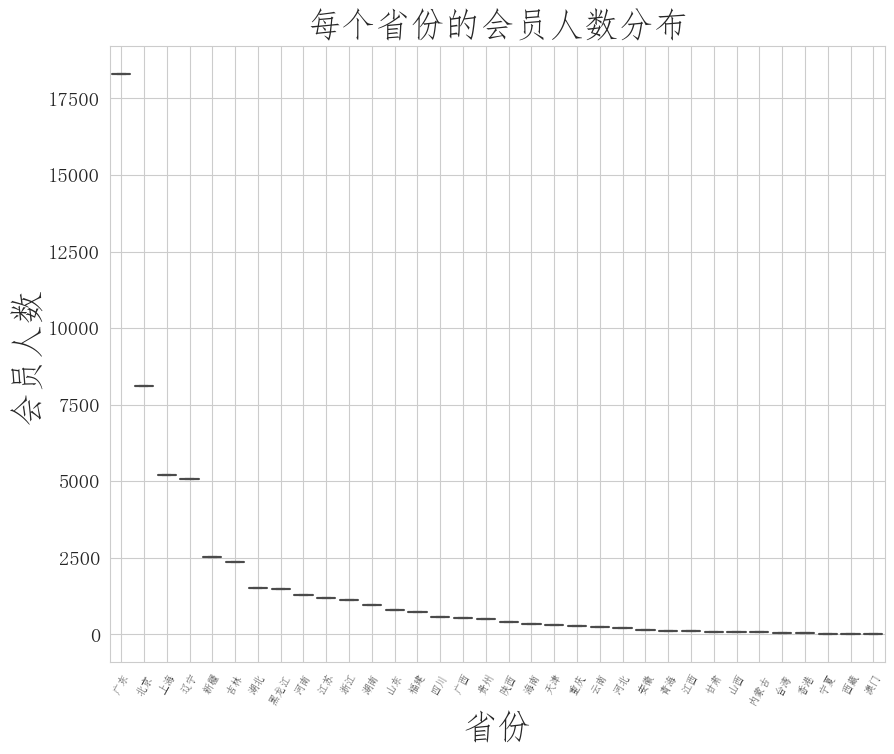

In [75]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='WORK_PROVINCE', y='count', data=vip_workpro_num, color='steelblue')
plt.grid()
plt.xlabel('省份')
plt.ylabel('会员人数')
plt.xticks(rotation=60)
plt.title('每个省份的会员人数分布')
plt.show()

绘制小提琴图

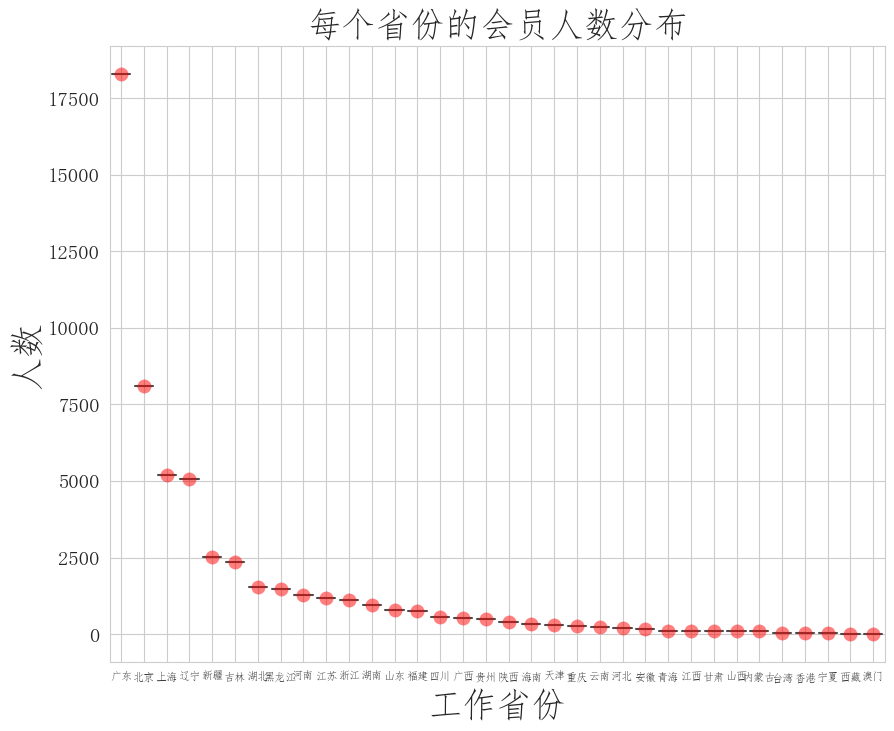

In [76]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='WORK_PROVINCE', y='count', data=vip_workpro_num, color='steelblue')
# 加入经过抖动处理的数据点
sns.stripplot(x='WORK_PROVINCE', y='count', data=vip_workpro_num, jitter=True, 
              color='r', s=10, alpha=0.5)
plt.grid()
plt.xlabel('工作省份')
plt.ylabel('人数')
plt.title('每个省份的会员人数分布')
plt.show()

# 问题二

In [77]:
# 设置全局的图形参数
sns.set_style(
    # 图形风格
    "whitegrid", 
    # 网格默认不显示
    {'axes.grid' : False})

sns.set_context(rc={
    # 标题大小
    'axes.titlesize': 25,
    # 轴的上标题大小
    'axes.labelsize': 25,
    # x轴刻度文字大小
    'xtick.labelsize': 15,                 #将刻度文字设置为纵向的
    # y轴刻度文字大小
    'ytick.labelsize': 15})

# 设置中文显示
# 不同系统的设置方式可能会有所不同！
matplotlib.rcParams['font.family']=['FangSong']
matplotlib.rcParams['axes.unicode_minus'] = False

  WORK_PROVINCE    variable         value
0            上海      积分兑换次数      0.250915
1            北京      积分兑换次数      0.264626
2            上海       总精英积分    110.338148
3            北京       总精英积分    238.139965
4            上海       总累计积分   9347.882149
5            北京       总累计积分  11714.887065
6            上海  非乘机的积分变动次数      1.908338
7            北京  非乘机的积分变动次数      2.286966
8            上海       总基本积分   8183.066821
9            北京       总基本积分  10404.685633


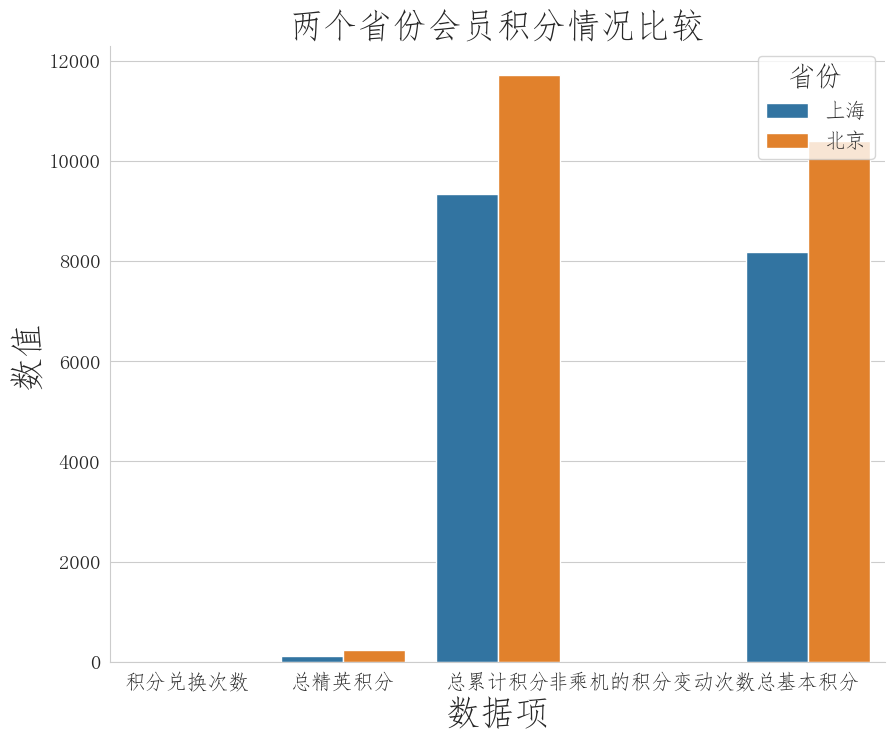

In [78]:
# 取出两个省份会员的数据
sub_workpro_fvip = fvip[fvip['WORK_PROVINCE'].isin(['北京', '上海'])]
# 计算两个省份的积分数据（平均）
sub_workpro_fvip_stats = sub_workpro_fvip.groupby('WORK_PROVINCE')\
    .agg({'EXCHANGE_COUNT': 'mean', 'EP_SUM': 'mean',  
          'Points_Sum': 'mean', 'Point_NotFlight': 'mean',
          'BP_SUM':'mean'}).reset_index()

# 将宽数据转为长数据方便作图
sub_workpro_fvip_stats = sub_workpro_fvip_stats.melt(id_vars='WORK_PROVINCE')
sub_workpro_fvip_stats.replace({'variable': {'EXCHANGE_COUNT': '积分兑换次数', 'EP_SUM': '总精英积分', 
                                             'Points_Sum': '总累计积分', 'Point_NotFlight': '非乘机的积分变动次数', 
                                             'BP_SUM': '总基本积分'}}, inplace=True)

print(sub_workpro_fvip_stats)
fig = plt.figure(figsize=(10, 8))
ax = fig.subplots()
sns.barplot(x='variable', y='value', hue='WORK_PROVINCE', data=sub_workpro_fvip_stats)
sns.despine()
# 设置图例
lgd = ax.legend(loc='upper right', fancybox=True, prop={'size': 15}, title='省份')
plt.setp(lgd.get_title(),fontsize=20)
plt.grid(axis='y')
plt.xlabel('数据项')
plt.ylabel('数值')
plt.title('两个省份会员积分情况比较')
plt.show()

# 问题三

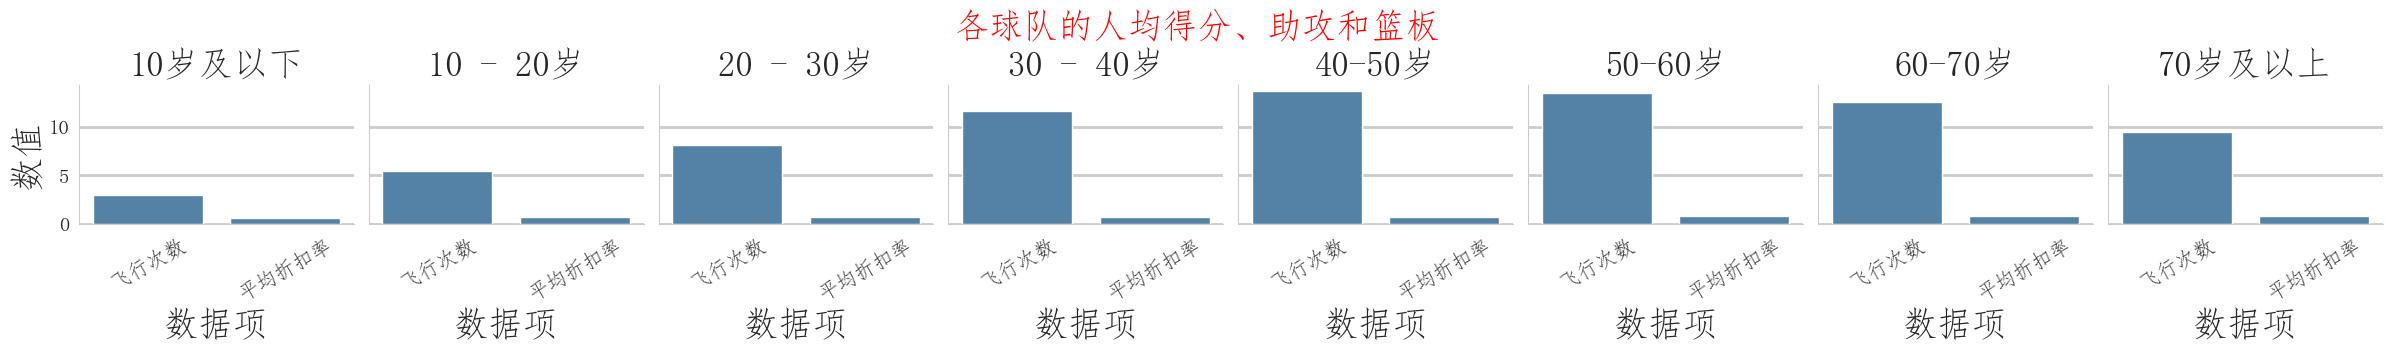

In [45]:
# 将会员按年龄进行分箱
# age_cuts = pd.cut(fvip['AGE'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 100], 
#                       labels=['10岁及以下', '10 - 20岁', '20 - 30岁', '30 - 40岁', '40-50岁', '50-60岁', '60-70岁', '70岁及以上'])
# fvip['AGE'] = age_cuts
# fvip['AGE']

# 按球队进行统计
fvip_stats = fvip.groupby('AGE')\
    .agg({'FLIGHT_COUNT': 'mean', 'avg_discount': 'mean'}).reset_index()
fvip_stats = fvip_stats.melt(id_vars='AGE')
fvip_stats = fvip_stats.replace({'variable': {'FLIGHT_COUNT': '飞行次数', 'avg_discount': '平均折扣率'}})

# 自定义一个画图函数
def plot_barplot(*args, **kwargs):
    df = pd.concat([args[0], args[1]], axis=1)
    ax = sns.barplot(x=df.columns[0], y=df.columns[1], data=df, color='steelblue')
    sns.despine()
    ax.grid(axis='y', linewidth=2)

# 创建分面
g = sns.FacetGrid(fvip_stats, col='AGE', col_wrap=8, margin_titles=True)
g.map(plot_barplot, 'variable', 'value')
g.set_axis_labels('数据项', '数值')
g.set_xticklabels(rotation=30)
g.set_titles(col_template = '{col_name}')

#调整图像
plt.subplots_adjust(top=8)

#添加标题
plt.subplots_adjust(top=0.73)
fig = plt.gcf()
fig.suptitle('各球队的人均得分、助攻和篮板', fontsize=25, color='red')
plt.show()

# 问题四

绘制基础散点图

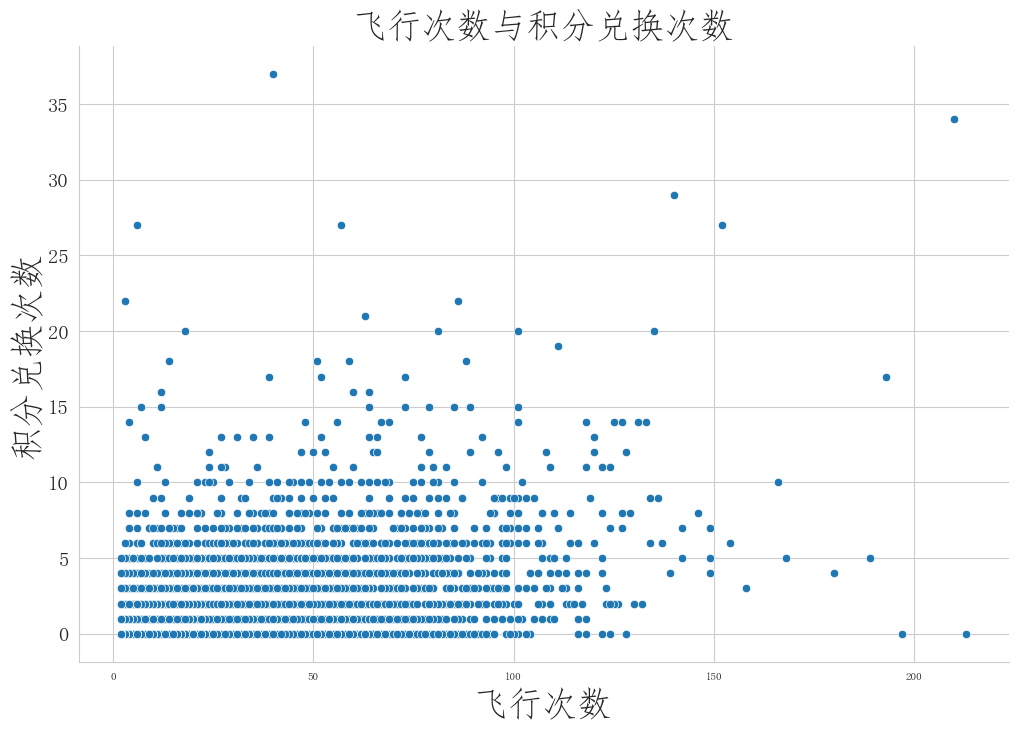

In [67]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='FLIGHT_COUNT', y='EXCHANGE_COUNT', data=fvip)
sns.despine()
plt.grid()
plt.xlabel('飞行次数')
plt.ylabel('积分兑换次数')
plt.title('飞行次数与积分兑换次数')
plt.show()

添加直方图

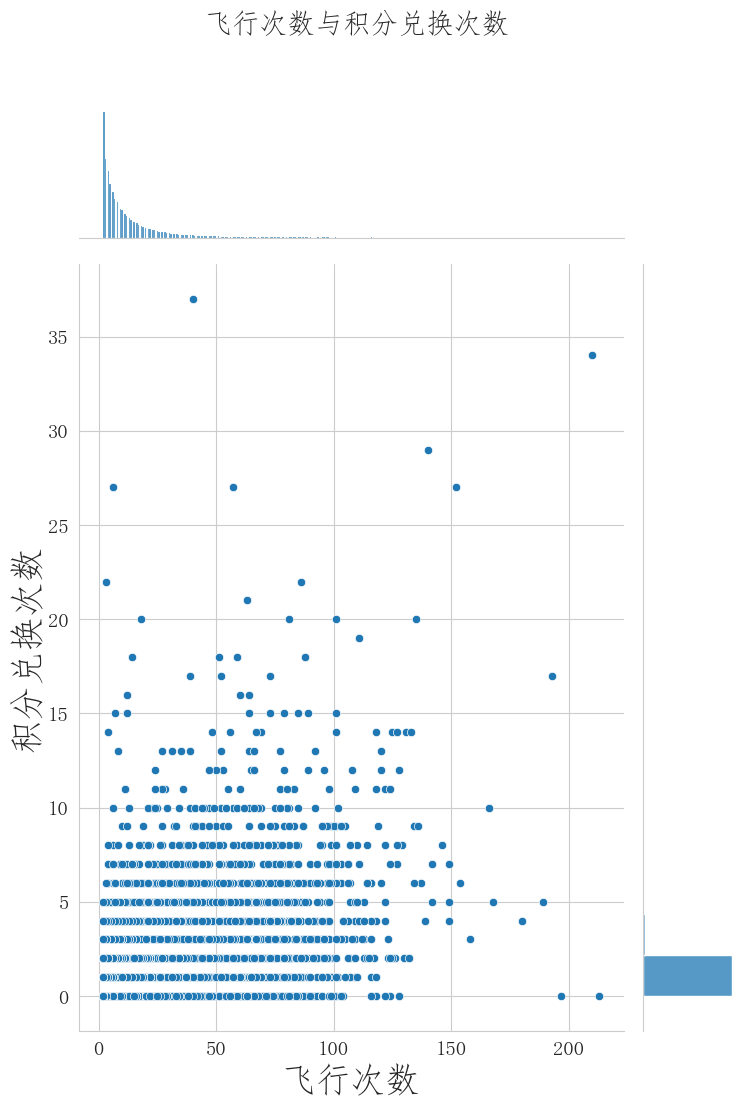

In [25]:
p = sns.jointplot(x='FLIGHT_COUNT', y='EXCHANGE_COUNT', data=fvip, kind='scatter')
p.ax_joint.set_xlabel('飞行次数')
p.ax_joint.set_ylabel('积分兑换次数')
p.ax_joint.grid()
fig = p.fig
fig.set_figheight(12)
fig.set_figwidth(8)
plt.subplots_adjust(top=0.9)
fig.suptitle('飞行次数与积分兑换次数', fontsize=20)
plt.show()

sns.displot

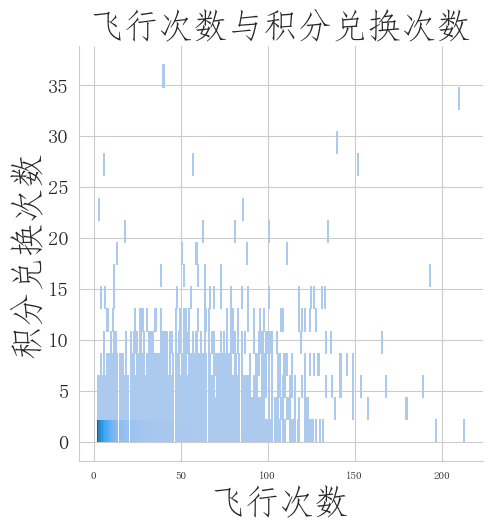

In [70]:
sns.displot(x='FLIGHT_COUNT', y='EXCHANGE_COUNT', data=fvip)
sns.despine()
plt.grid()
plt.xlabel('飞行次数')
plt.ylabel('积分兑换次数')
plt.title('飞行次数与积分兑换次数')
plt.show()